In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [3]:
url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
df = pd.read_csv(url)

In [8]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [10]:
df.dtypes

crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
b          float64
lstat      float64
medv       float64
dtype: object

In [13]:
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [14]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


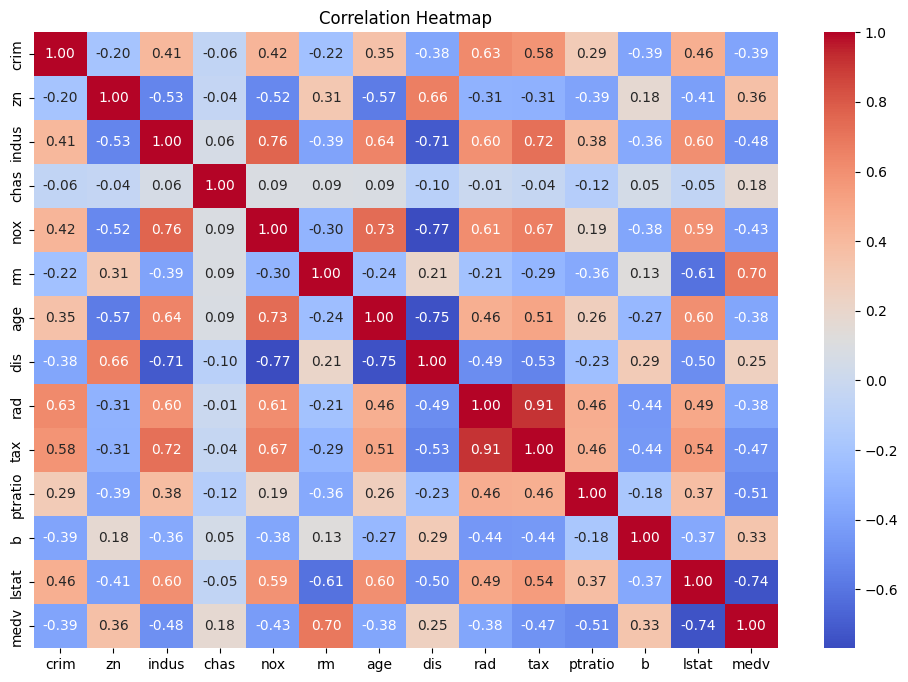

In [15]:
#correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm",fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

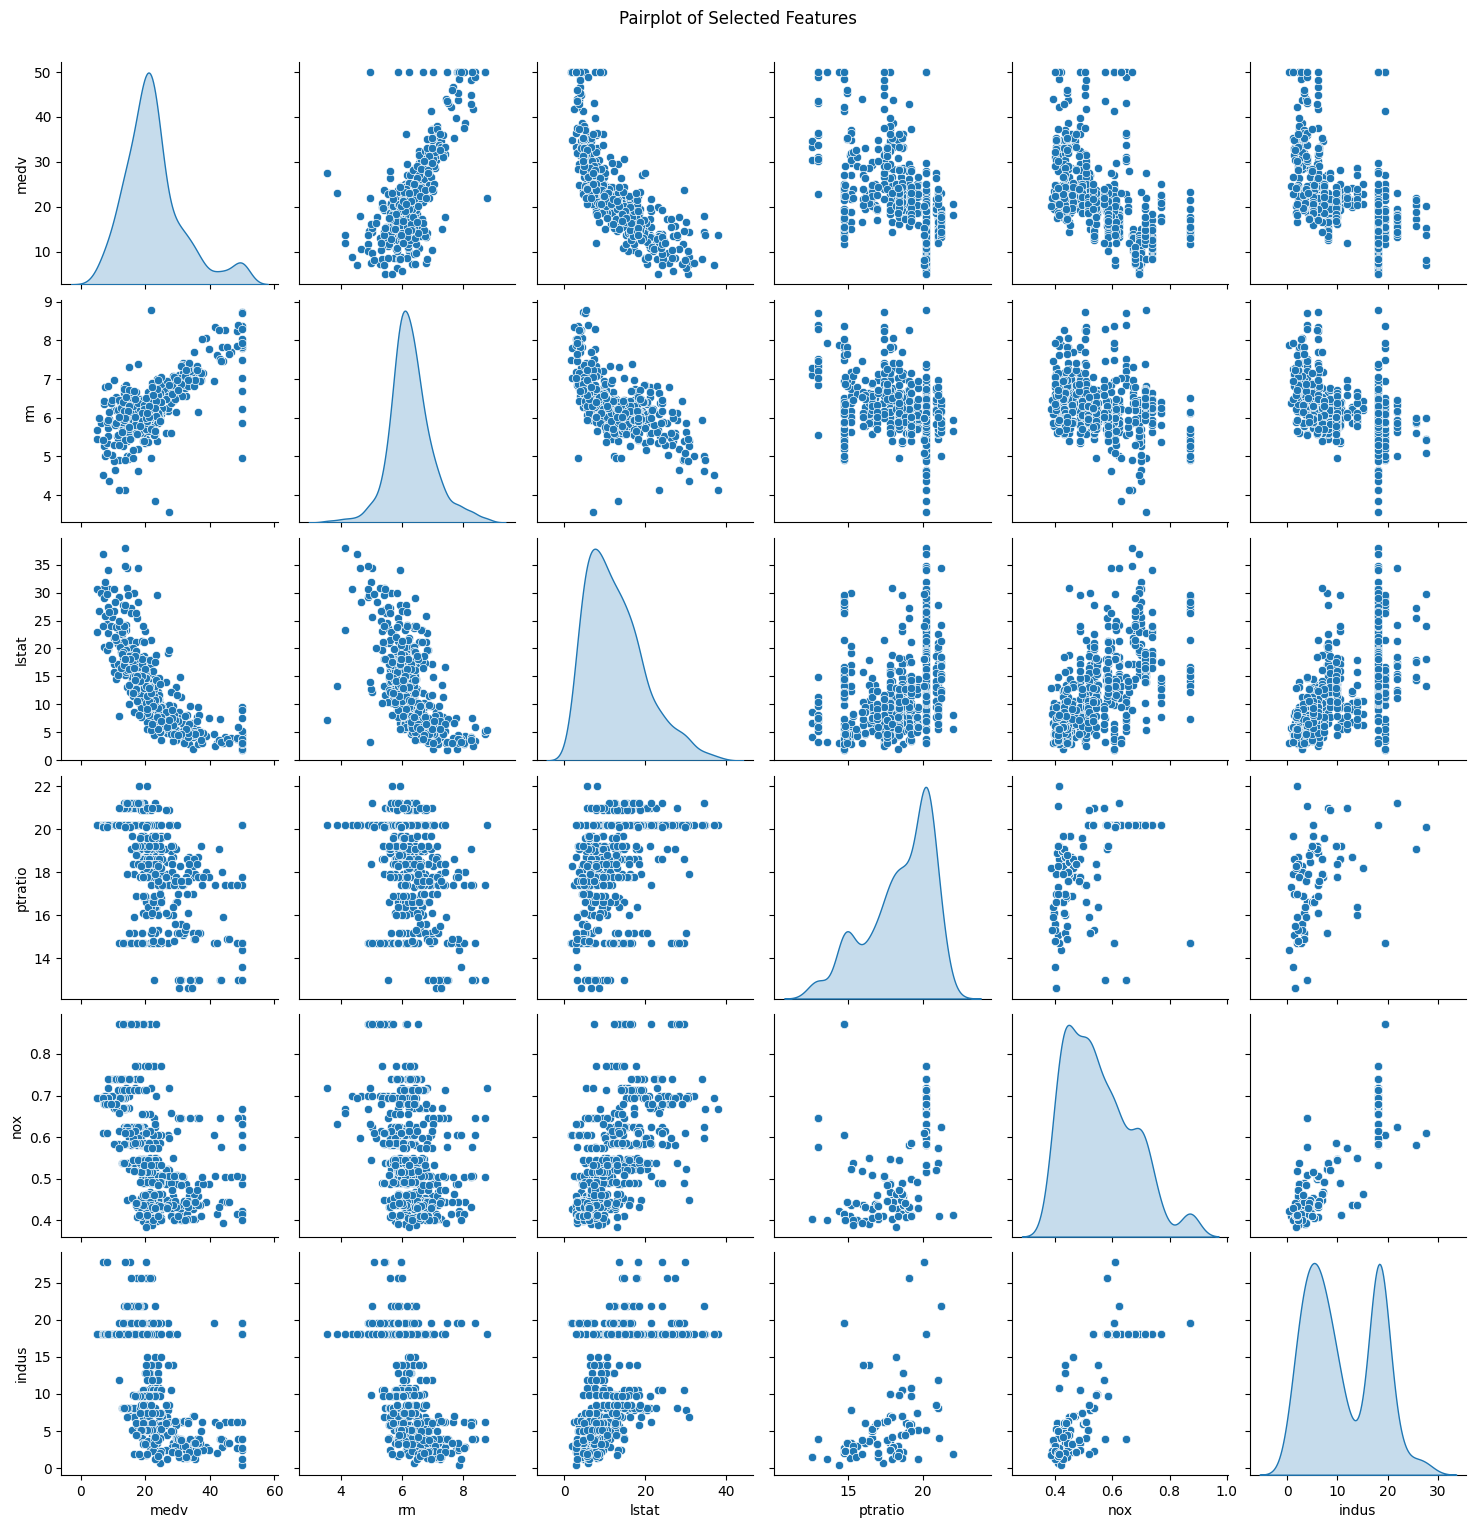

In [16]:
# Pairplot for key variables
selected_features = ['medv', 'rm', 'lstat', 'ptratio', 'nox', 'indus']
sns.pairplot(df[selected_features], diag_kind='kde')
plt.suptitle("Pairplot of Selected Features", y=1.02)
plt.show()

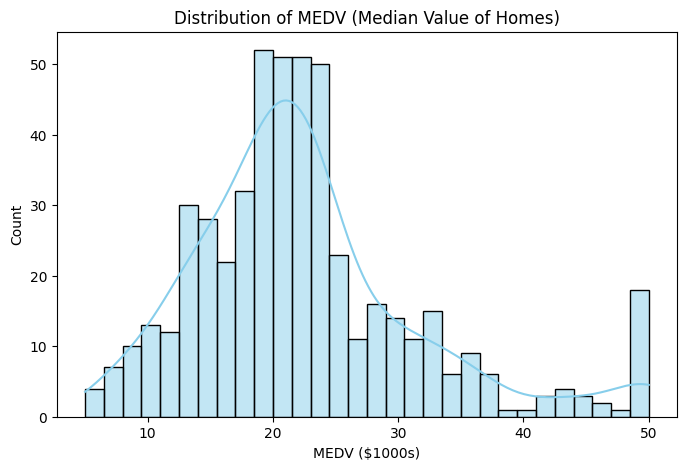

In [17]:
# Distribution of target variable
plt.figure(figsize=(8, 5))
sns.histplot(df['medv'], kde=True, bins=30, color='skyblue')
plt.title("Distribution of MEDV (Median Value of Homes)")
plt.xlabel("MEDV ($1000s)")
plt.show()

In [21]:
#Simple Linear Regression
x=df[['rm']]
y=df['medv']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)
model_simple = LinearRegression()
model_simple.fit(x_train, y_train)
y_pred= model_simple.predict(x_test)

In [23]:
print("Simple Linear Regression:")
print("R²:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

Simple Linear Regression:
R²: 0.6335439948424493
MAE: 4.090064955184419
RMSE: 5.536929907868703


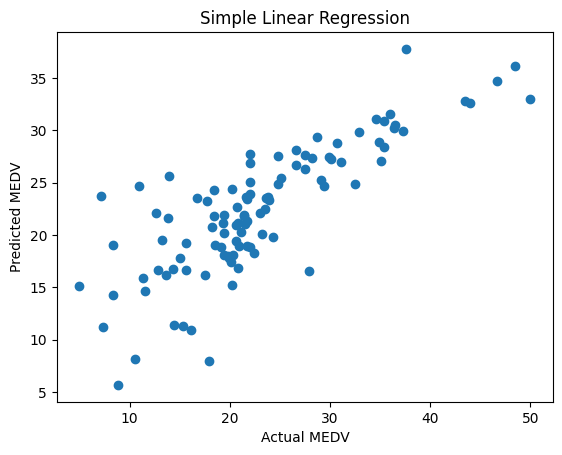

In [26]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual MEDV")
plt.ylabel("Predicted MEDV")
plt.title("Simple Linear Regression")
plt.show()

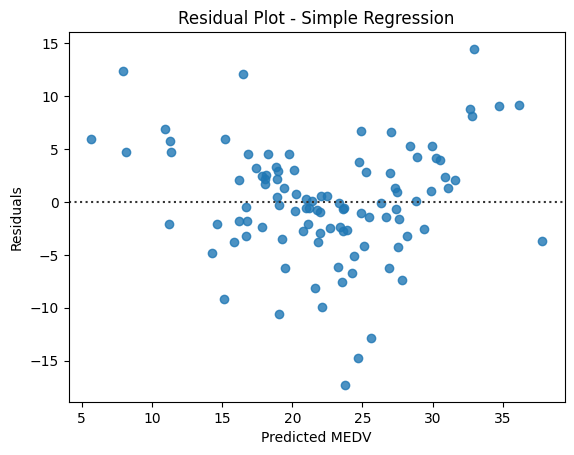

In [29]:
# Residual plot
residuals = y_test - y_pred
sns.residplot(x=y_pred, y=residuals)
plt.xlabel("Predicted MEDV")
plt.ylabel("Residuals")
plt.title("Residual Plot - Simple Regression")
plt.show()

In [32]:
# 3. Multiple Linear Regression 
cm = df.corr().abs()
top_features = cm['medv'].sort_values(ascending=False)[1:6].index.tolist()
print("Top 5 features:", top_features)



Top 5 features: ['lstat', 'rm', 'ptratio', 'indus', 'tax']


In [34]:
X_multi = df[top_features]
X_train, X_test, y_train, y_test = train_test_split(X_multi, y, test_size=0.2, random_state=42)

model_multi = LinearRegression()
model_multi.fit(X_train, y_train)
y_pred_m = model_multi.predict(X_test)

print("\nMultiple Linear Regression:")
print("R²:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))




Multiple Linear Regression:
R²: -0.5360379066130203
MAE: 8.243180680008683
RMSE: 10.6133628398164


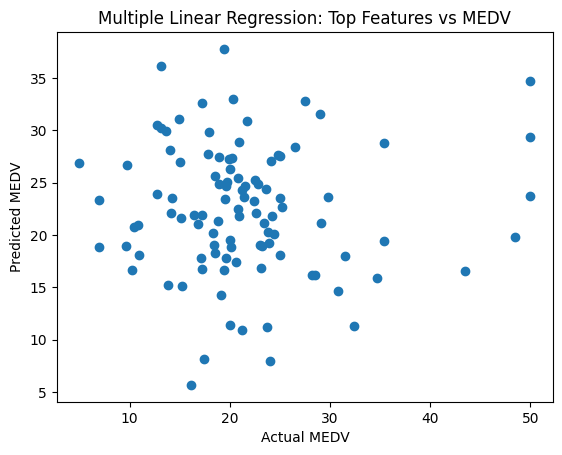

In [36]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual MEDV")
plt.ylabel("Predicted MEDV")
plt.title("Multiple Linear Regression: Top Features vs MEDV")
plt.show()

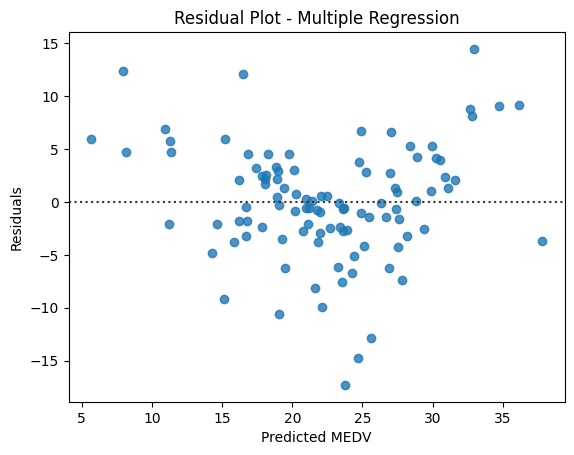

In [38]:
# Residual plot
residuals_m = y_test - y_pred
sns.residplot(x=y_pred, y=residuals)
plt.xlabel("Predicted MEDV")
plt.ylabel("Residuals")
plt.title("Residual Plot - Multiple Regression")
plt.show()